In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import odeint

%matplotlib inline

In [2]:
"""Initial parameter functions"""
def seperation_angle(n):
    return ( (2*math.pi)/n )

def setup_radius(sep, diam, PHI):
    return ( (sep + diam)/(2 * math.sin(PHI/2)) )

def cog_length( Rp, PHI, width):
    r = (Rp*math.sin(PHI) - width)/(2*math.sin(PHI/2))
    return r

def width( Rp, PHI):
    w = ( Rp*math.sin(PHI) )/2
    return w

def volume( Rp, r, w, thc, p): #volume of segment
    V = ( ((math.pi*( (Rp**2) - ((Rp-r)**2) ))/p) - r*w ) * thc
    return V

def mass( volume, density): #mass of fluid in segment
    M = volume * density
    return M

def number(mass, atm): #number of fluid particles in segment
    N = mass/atm
    return N

In [102]:
def sd( kb, temp, particle_mass, no_of_particles, time_step):
    sigma = math.sqrt((4*kb*temp*particle_mass*(no_of_particles**2)*(time_step**2)*(3*math.pi - 8))/(math.pi**5))
    return sigma

def sd3( kb, temp, particle_mass, no_of_particles, time_step):
    sigma = math.sqrt((kb*temp*particle_mass*(no_of_particles**2)*(time_step**2)*(3*math.pi - 8))/(4*math.pi)) * (0.5 - (4/(math.pi**2)))
    return sigma

def vp( kb, temp, particle_mass):
    v = math.sqrt((2*kb*temp)/particle_mass)
    return v

def mean(kb, temp, particle_mass, no_of_particles, time_step):
    v = vp( kb, temp, particle_mass)
    mu = (2*v*particle_mass*no_of_particles*time_step)/(math.pi**2)
    return mu

def rand_fb(kb, temp, particle_mass, no_of_particles, time_step):
    mu = mean(kb, temp, particle_mass, no_of_particles, time_step)
    sigma = sd3( kb, temp, particle_mass, no_of_particles, time_step)
    boundary = 3*sigma
    rfb = random.uniform(mu - boundary, mu + boundary)
    return rfb

def rand_ffb(kb, temp, particle_mass, no_of_particles, time_step, fb):
    sigma = sd3( kb, temp, particle_mass, no_of_particles, time_step)
    rffb_max = (1**2)/(math.sqrt(2*math.pi*(sigma**2)))
    rffb = random.uniform( 0, rffb_max)
    return rffb

def prob_dist_fb(kb, temp, particle_mass, no_of_particles, time_step, fb):
    mu = mean(kb, temp, particle_mass, no_of_particles, time_step)
    sigma = sd3( kb, temp, particle_mass, no_of_particles, time_step)
    ffb = (1**2)/(math.sqrt(2*math.pi*(sigma**2))) * math.exp( -((fb-mu)**2)/(2*(sigma**2)) )
    return ffb

In [22]:
"""Material dependant constants:"""
'''Fluid'''
fluid_density = 0.164 #helium
atm = 4.002602 * 1.6605402e-27 #helium atomic mass
pressure = 101.325e3
temp = 298.15
A1 = 1.277
kb = 1.38064852e-23 

In [103]:
"""Initial parameters:"""
'''QDs'''
diam = 10e-9 #diameter of QDs [m]
sep = 130e-9 #seperation of QDs [m] (corresponds to motor dead zone)
n = 24   #number of QDs [no unit]
PHI = seperation_angle(n) #angle of seperation between QDs
R = setup_radius(sep, diam, PHI)  #radius of QD setup [m] 5.36290830288e-07
'''Inner section'''
p = int(n/2)   #number of permanent charges (PCs) [no unit]
r0 = 110e-9
Rp = R - r0   #radius of rotating disc [m]
w = width( Rp, PHI )#cog "tooth"/capacitor arm width [m]
r = cog_length( Rp, PHI, w)    #length of the cog shaft [m]
thc = 30e-9   #approximate thickeness of inner disc [m]
V = volume( Rp, r, w, thc, p)
M = mass(V, fluid_density)
number_of_particles = int( number(M, atm) )
print (number_of_particles)

17631


In [104]:
fb_list = []
for j in np.arange(0, 10000, 1):     
    accepted = 0
    while(accepted == 0):
        fb = rand_fb(kb, temp, atm, number_of_particles, 1e-6)
        ffb = prob_dist_fb(kb, temp, atm, number_of_particles, 1e-6, fb) #probability of fb
        rffb = rand_ffb(kb, temp, atm, number_of_particles, 1e-6, fb) #random number between 0 and peak probability
        if (rffb <= ffb): #if random number <= probability of fb, than accept fb
            fb_list.append( fb )
            accepted = 1

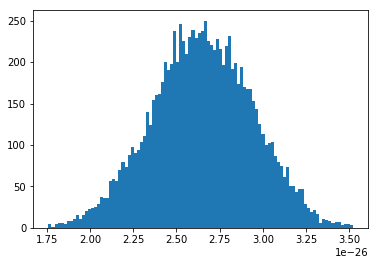

In [105]:
plt.hist(fb_list, 100)
plt.show()

In [ ]:
fb_list = []
for j in np.arange(0, 10000, 1):     
    accepted = 0
    while(accepted == 0):
        fb = rand_fb(kb, temp, atm, number_of_particles, 1e-6)
        ffb = prob_dist_fb(kb, temp, atm, number_of_particles, 1e-6, fb) #probability of fb
        rffb = rand_ffb(kb, temp, atm, number_of_particles, 1e-6, fb) #random number between 0 and peak probability
        if (rffb <= ffb): #if random number <= probability of fb, than accept fb
            fb_list.append( fb )
            accepted = 1